In [1]:
import scanpy as sc

[Executed on 2023-11-21 11:13:48.665896]


In [16]:
adata=sc.read_h5ad("/proj/sensoryaging/data/data/new_data_11.9/modified_data/modified.h5ad")
adata

[Executed on 2023-11-21 11:55:28.627351]


AnnData object with n_obs × n_vars = 22656 × 55763
    obs: 'platesID'
    layers: 'reads', 'umi'

In [17]:
adata_with_CN=adata[adata.obs['platesID'].isin(['11100344','11100033','11074748','11176276','11074752'])]
adata_with_CN

[Executed on 2023-11-21 11:58:23.974713]


View of AnnData object with n_obs × n_vars = 1920 × 55763
    obs: 'platesID'
    layers: 'reads', 'umi'

In [18]:
adata_with_CN.write_h5ad('/proj/sensoryaging/60_plates_data/CNs/adata_with_CN_original.h5ad')

[Executed on 2023-11-21 11:58:25.751216]


In [19]:
adata_with_SGNs=adata[adata.obs['platesID'].isin(['11247716', '11247074', '11247668', '11177025','11170726','11170728','11177020','11170729','11177026','11170731','11177028','11177066','11101606','11101603'])]
adata_with_SGNs

[Executed on 2023-11-21 11:59:51.569668]


View of AnnData object with n_obs × n_vars = 5376 × 55763
    obs: 'platesID'
    layers: 'reads', 'umi'

In [25]:
adata_with_SGNs.write_h5ad('/proj/sensoryaging/60_plates_data/Sgns/adata_with_Sgns_original.h5ad')

[Executed on 2023-11-21 12:01:59.464293]


In [22]:
# Define the plates ID for each batch
batch_1 = ['11247716', '11247074', '11247668']
batch_2 = ['11177025', '11170726', '11170728', '11177020', '11170729', '11177026', '11170731', '11177028', '11177066']
batch_3 = ['11101606', '11101603']

# Update the DataFrame
adata_with_SGNs.obs['batch'] = 'unknown'  # Initialize with 'unknown' or any default label
adata_with_SGNs.obs.loc[adata.obs['platesID'].isin(batch_1), 'batch'] = 'batch 1'
adata_with_SGNs.obs.loc[adata.obs['platesID'].isin(batch_2), 'batch'] = 'batch 2'
adata_with_SGNs.obs.loc[adata.obs['platesID'].isin(batch_3), 'batch'] = 'batch 3'


[Executed on 2023-11-21 12:01:15.632421]


/scratch/42948605/ipykernel_14666/1983183955.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_with_SGNs.obs['batch'] = 'unknown'  # Initialize with 'unknown' or any default label


In [23]:
adata_with_SGNs.obs

[Executed on 2023-11-21 12:01:35.209112]


,platesID,batch
AACATCGAGGAACGGAGTAA,11177025,batch 2
AACATCGAGGAAGTCGAGAT,11177025,batch 2
AACATCGAGGACGCGTCTGA,11177025,batch 2
AACATCGAGGAGCTACGTAT,11177025,batch 2
AACATCGAGGATCCGACGTT,11177025,batch 2
...,...,...
TTGTTCGTTGTTACCGCGTG,11247074,batch 1
TTGTTCGTTGTTCCTCCGTG,11247668,batch 1
TTGTTCGTTGTTCGTCTGCA,11247668,batch 1
TTGTTCGTTGTTCTCTGTGA,11247074,batch 1


In [67]:
adata=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Sgns/adata_with_Sgns_original.h5ad")

[Executed on 2023-11-21 12:16:35.548758]


In [69]:
adata

[Executed on 2023-11-21 12:16:53.699161]


AnnData object with n_obs × n_vars = 5376 × 55763
    obs: 'platesID', 'batch'
    layers: 'reads', 'umi'

[Executed on 2023-11-21 12:16:56.518142]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

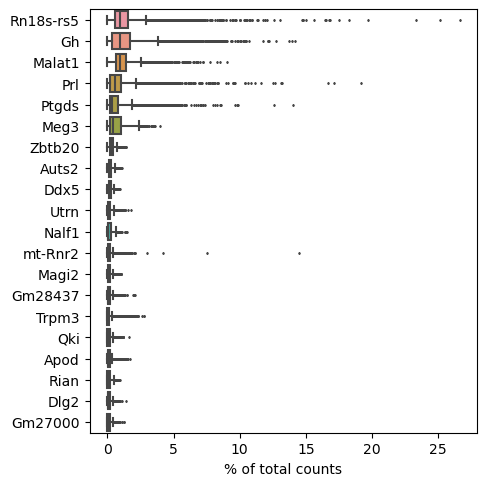

In [70]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [71]:
adata.var_names_make_unique()

[Executed on 2023-11-21 12:16:58.274430]


In [72]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

[Executed on 2023-11-21 12:16:58.750882]


In [73]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

[Executed on 2023-11-21 12:17:16.464650]


[Executed on 2023-11-21 12:17:17.893094]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

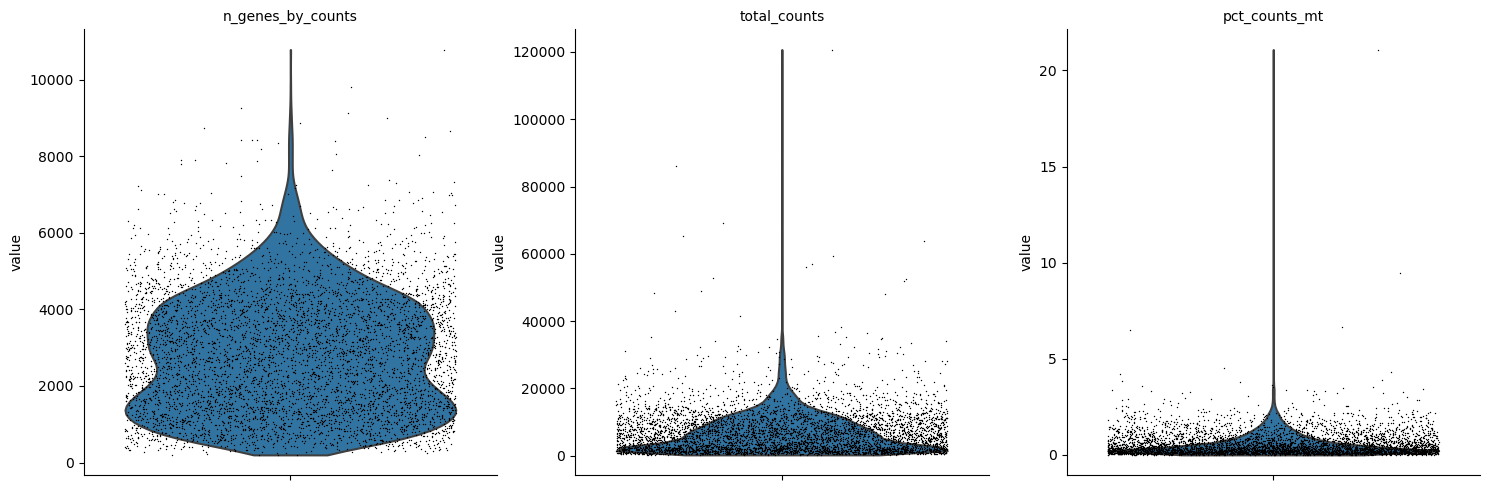

In [74]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

[Executed on 2023-11-21 12:17:33.473379]


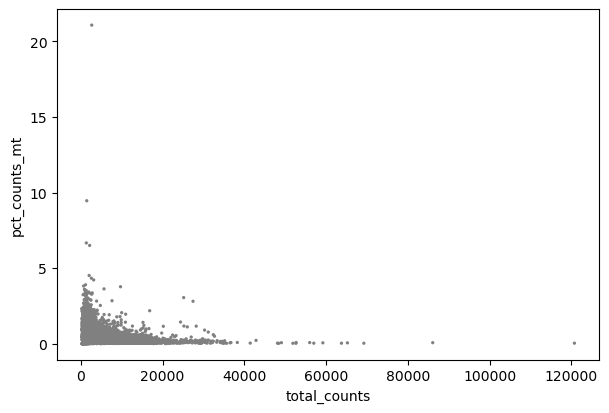

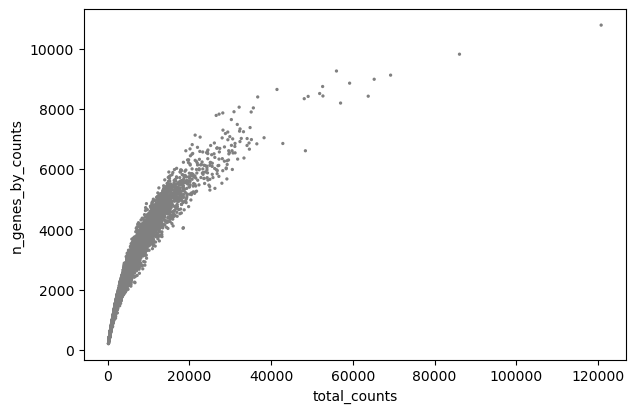

In [75]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [76]:
#filter cells that below 2500 genes by counts
adata = adata[adata.obs.n_genes_by_counts > 2000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

[Executed on 2023-11-21 12:17:35.252391]


In [77]:
adata

[Executed on 2023-11-21 12:17:37.108521]


View of AnnData object with n_obs × n_vars = 3413 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'reads', 'umi'

[Executed on 2023-11-21 12:17:38.761386]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_utils.py:431: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarnin

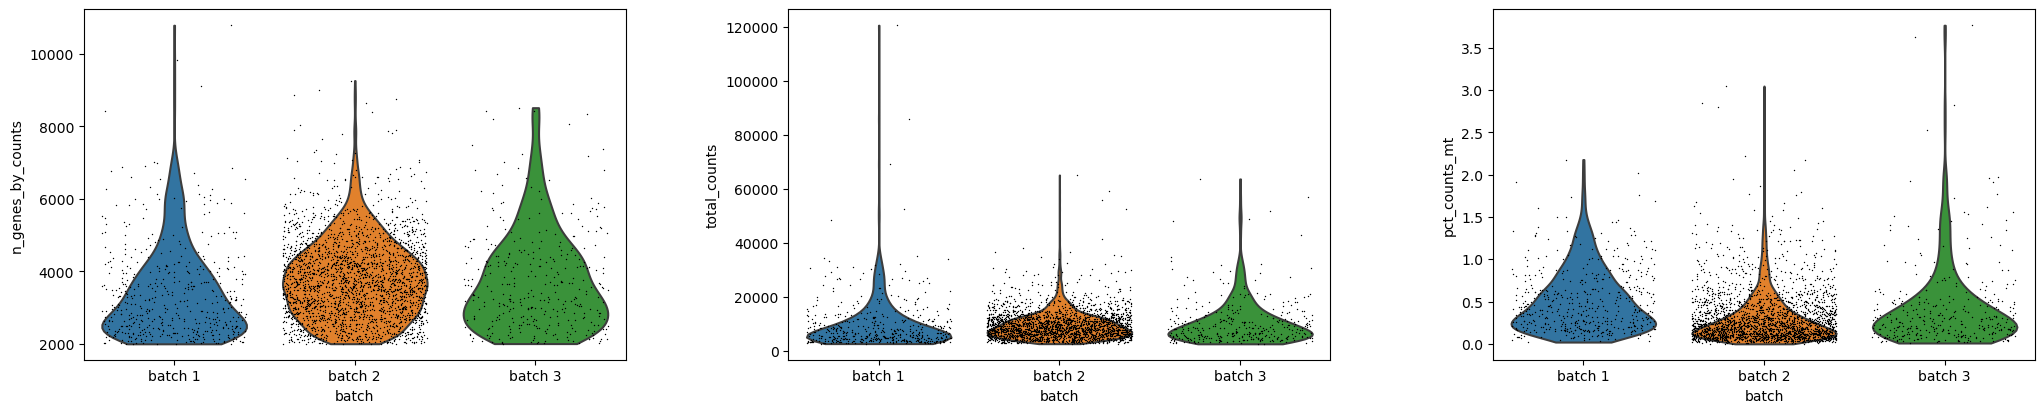

In [78]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True,groupby='batch')

In [79]:
sc.pp.combat(adata, key='batch')

[Executed on 2023-11-21 12:17:48.431901]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/preprocessing/_combat.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_info = model.groupby(key).indices.values()
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/preprocessing/_combat.py:95: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_items = model.groupby(batch_key).groups.items()


Found 9 genes with zero variance.


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: invalid value encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


[Executed on 2023-11-21 12:18:19.115488]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_ol

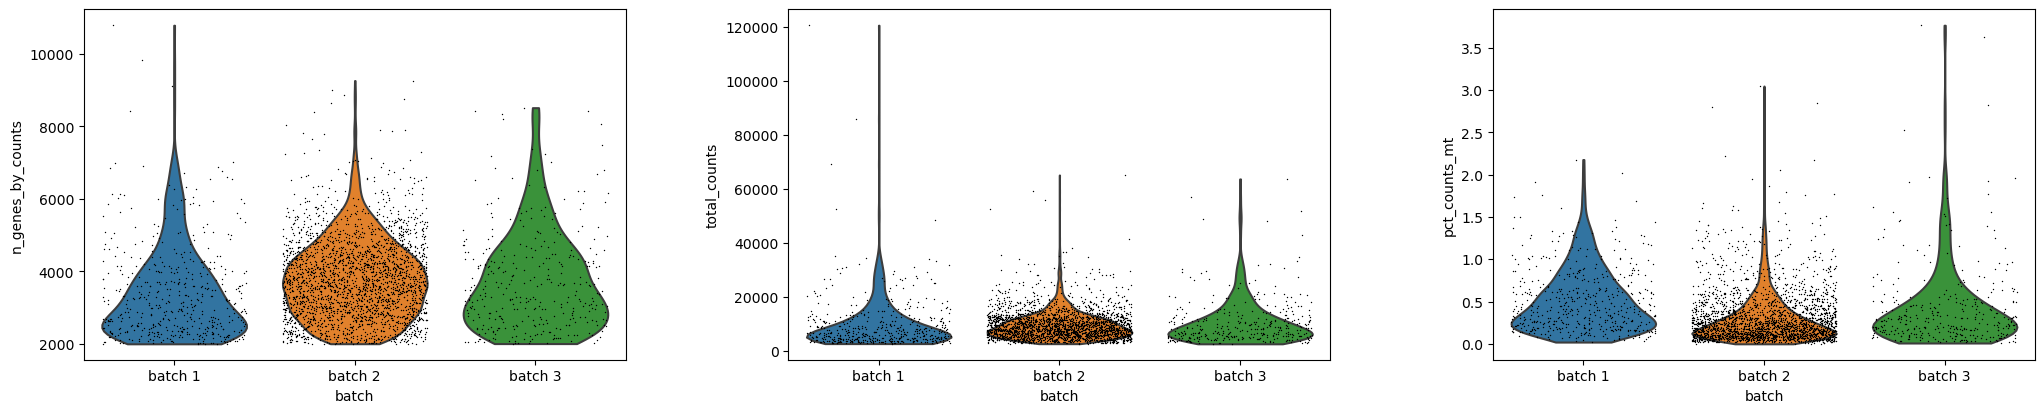

In [80]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True,groupby='batch')

In [81]:
adata

[Executed on 2023-11-21 12:18:53.258539]


AnnData object with n_obs × n_vars = 3413 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors'
    layers: 'reads', 'umi'

[Executed on 2023-11-21 12:27:37.801340]


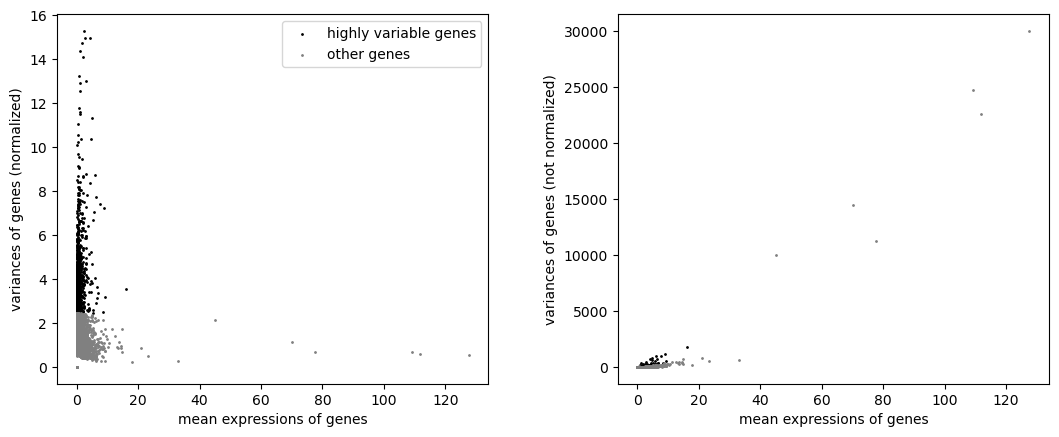

In [85]:
adata.X=adata.layers['umi'].copy()
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,n_top_genes=1000,flavor='seurat_v3',layer='umi')
sc.pl.highly_variable_genes(adata)

[Executed on 2023-11-21 12:28:00.642597]


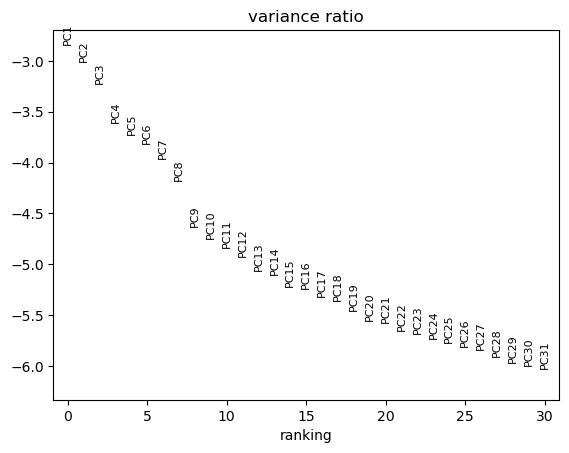

In [86]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [90]:
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=8)
sc.tl.leiden(adata,resolution=0.3)
sc.tl.umap(adata)



[Executed on 2023-11-21 12:30:50.388099]


In [94]:
adata

[Executed on 2023-11-21 12:33:44.758963]


AnnData object with n_obs × n_vars = 3413 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'reads', 'umi'
    obsp: 'distances', 'connectivities'

[Executed on 2023-11-21 12:35:35.662874]


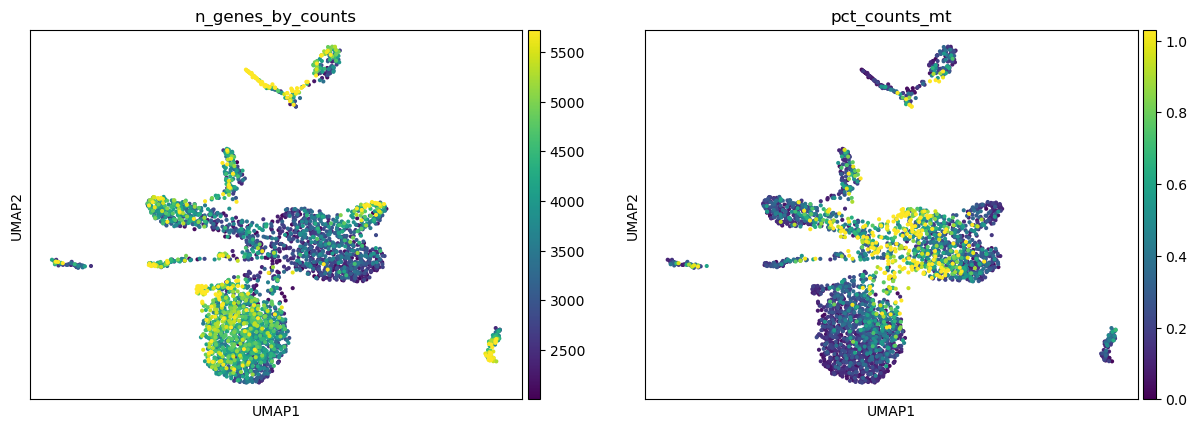

In [97]:
sc.pl.umap(adata,color=['n_genes_by_counts','pct_counts_mt'],vmax='p95',layer='log1p')

In [95]:
adata.X = adata.layers['umi'].copy()
sc.pp.normalize_total(adata, target_sum=None)
sc.pp.log1p(adata)
adata.layers['log1p'] = adata.X.copy()
sc.pp.scale(adata, max_value=10)
adata.layers['Scale'] = adata.X.copy()
adata.X = adata.layers['umi'].copy()

[Executed on 2023-11-21 12:35:03.758698]


In [98]:
adata.write_h5ad('/proj/sensoryaging/60_plates_data/Sgns/adata_with_Sgns_first_glance.h5ad')

[Executed on 2023-11-21 12:36:36.791379]


In [99]:
#From article Neuronal heterogeneity and stereotyped connectivity in the auditory afferent system 
neuron_cell_markers=['leiden','Slc17a7','Calb1','Runx1','Pou4f1','Grm8','Calb2','Trim54','Rxrg','Pcdh20','Prph','Plk5','Th','Cacna1g','Tubb3','Elavl3','Lypd1','Pcp4','Prox1','Snap25','Syp','Nefh','Pvalb','Slc17a8','Myo7a']

[Executed on 2023-11-21 13:06:56.223951]


[Executed on 2023-11-21 13:07:09.628852]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


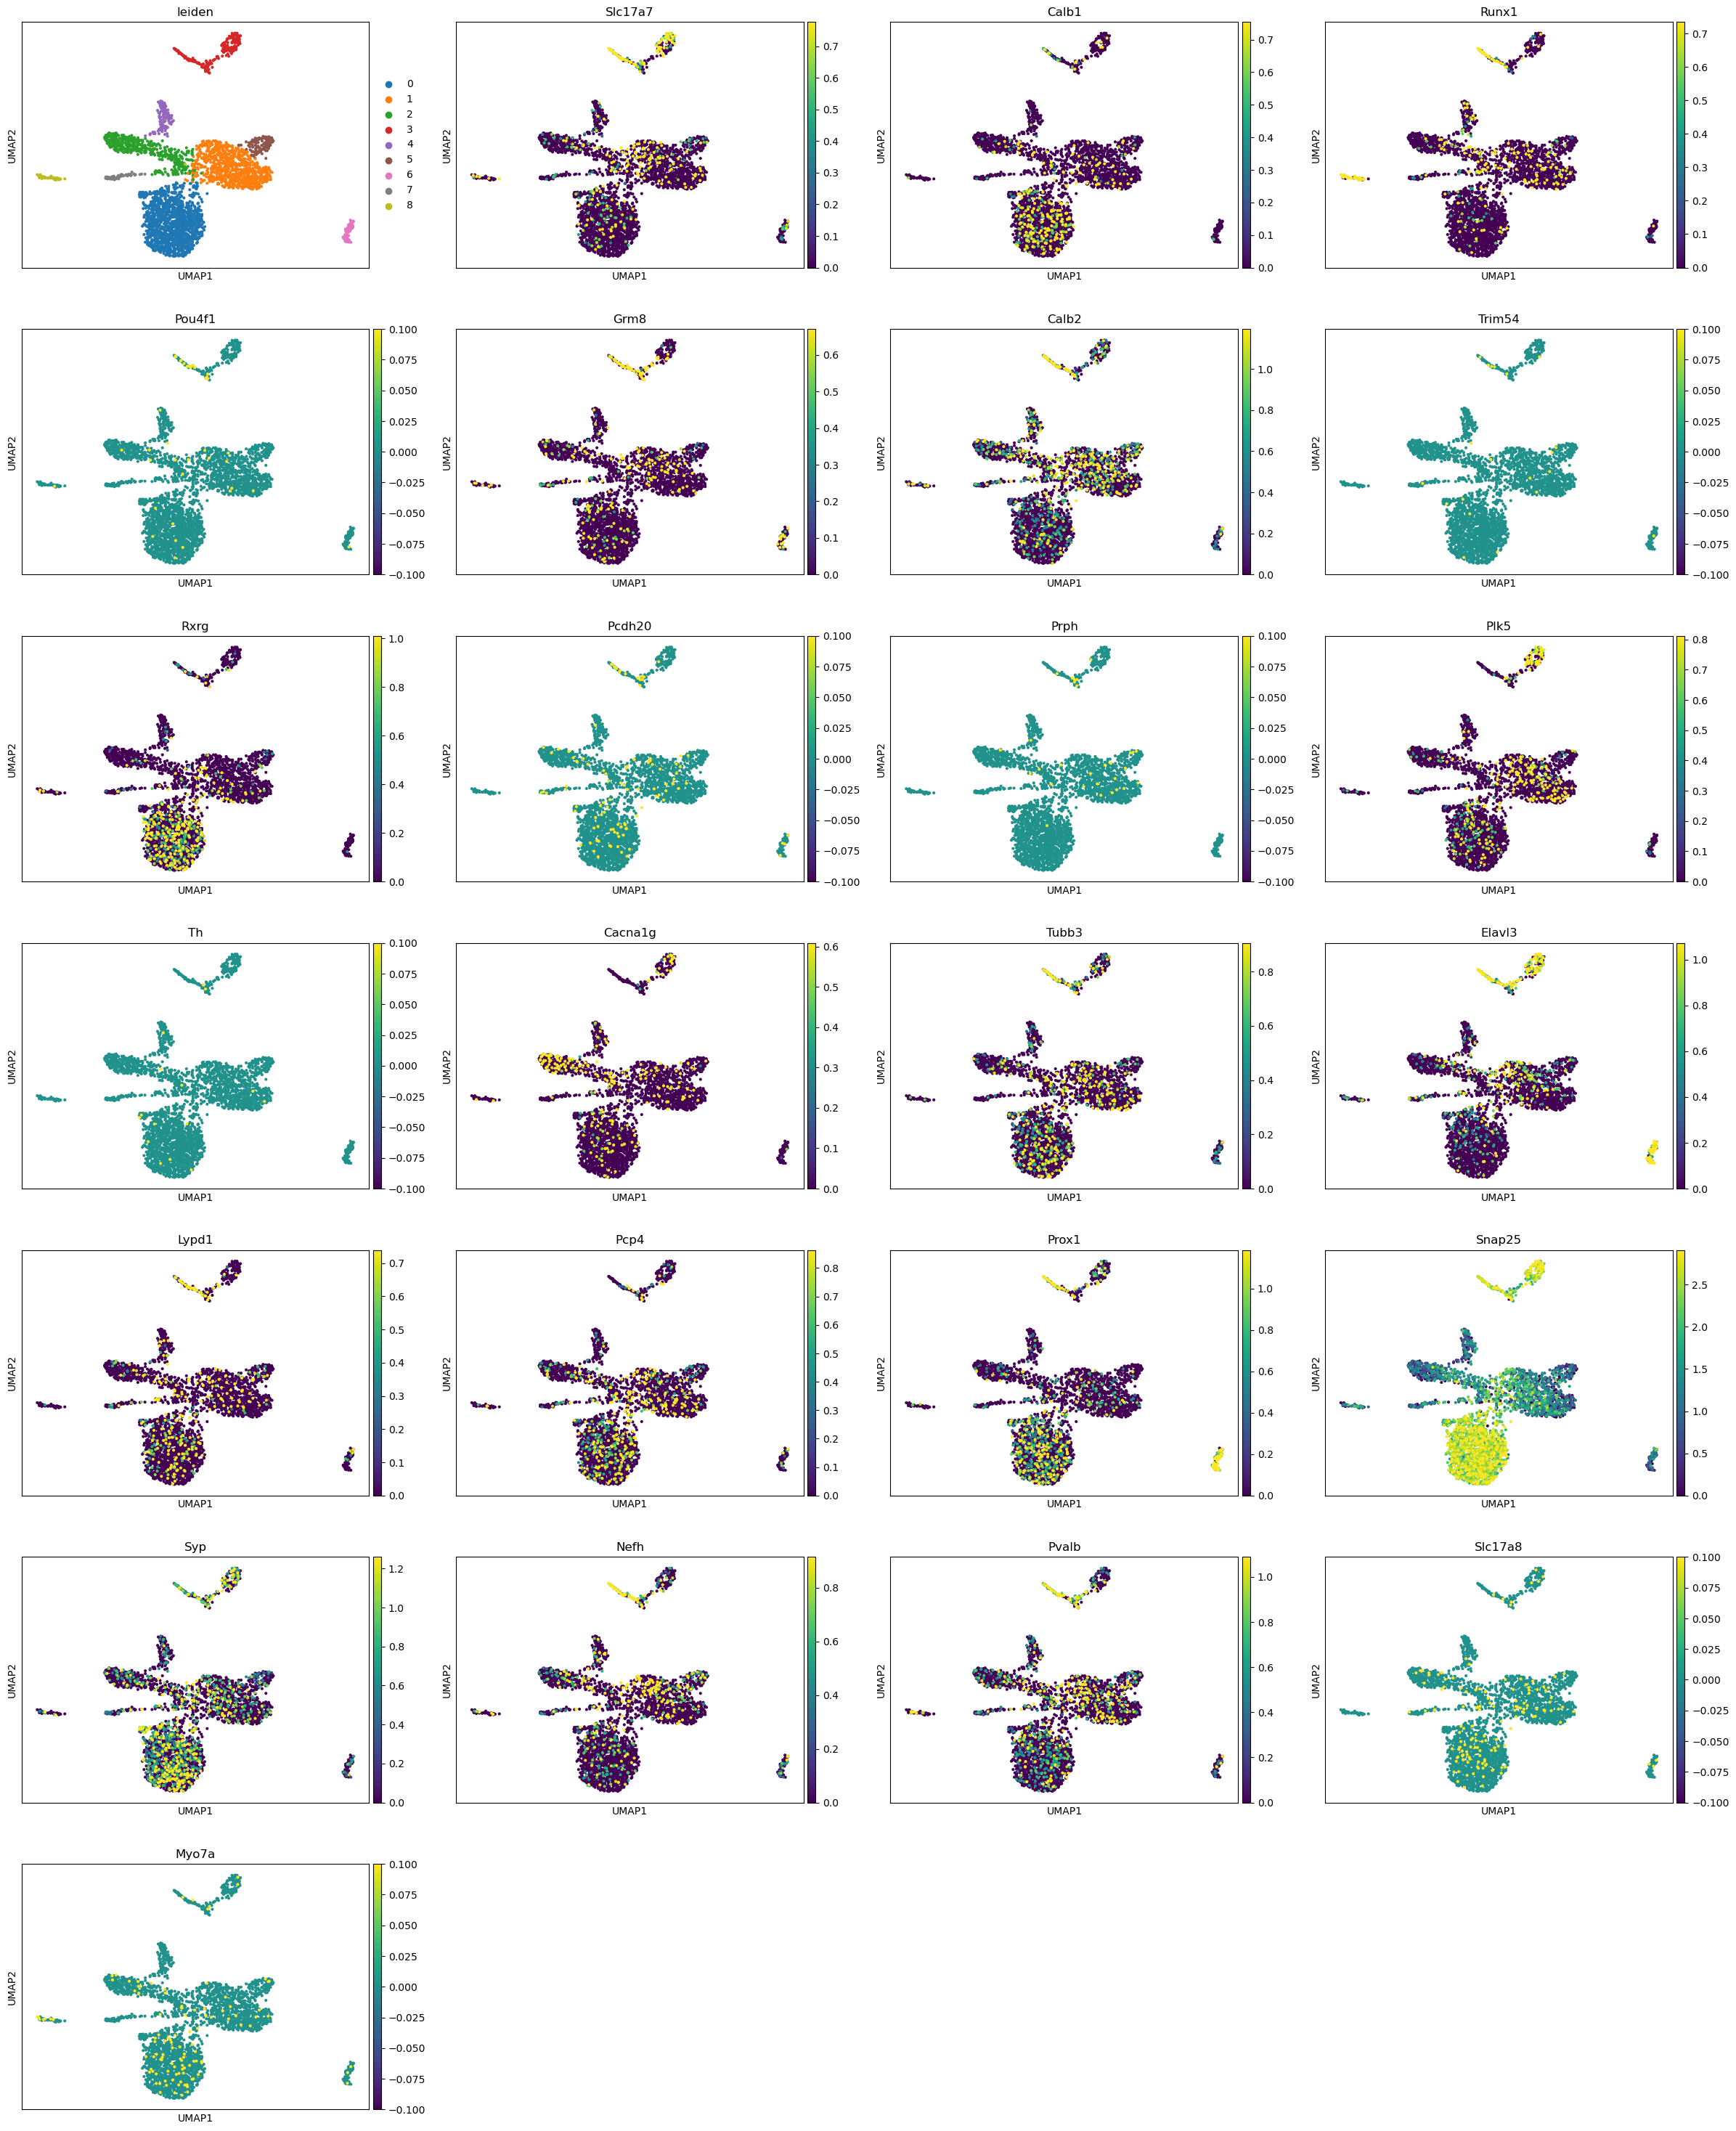

In [100]:
sc.pl.umap(adata,color=neuron_cell_markers,vmax='p95',layer='log1p')

[Executed on 2023-11-21 13:10:07.363862]


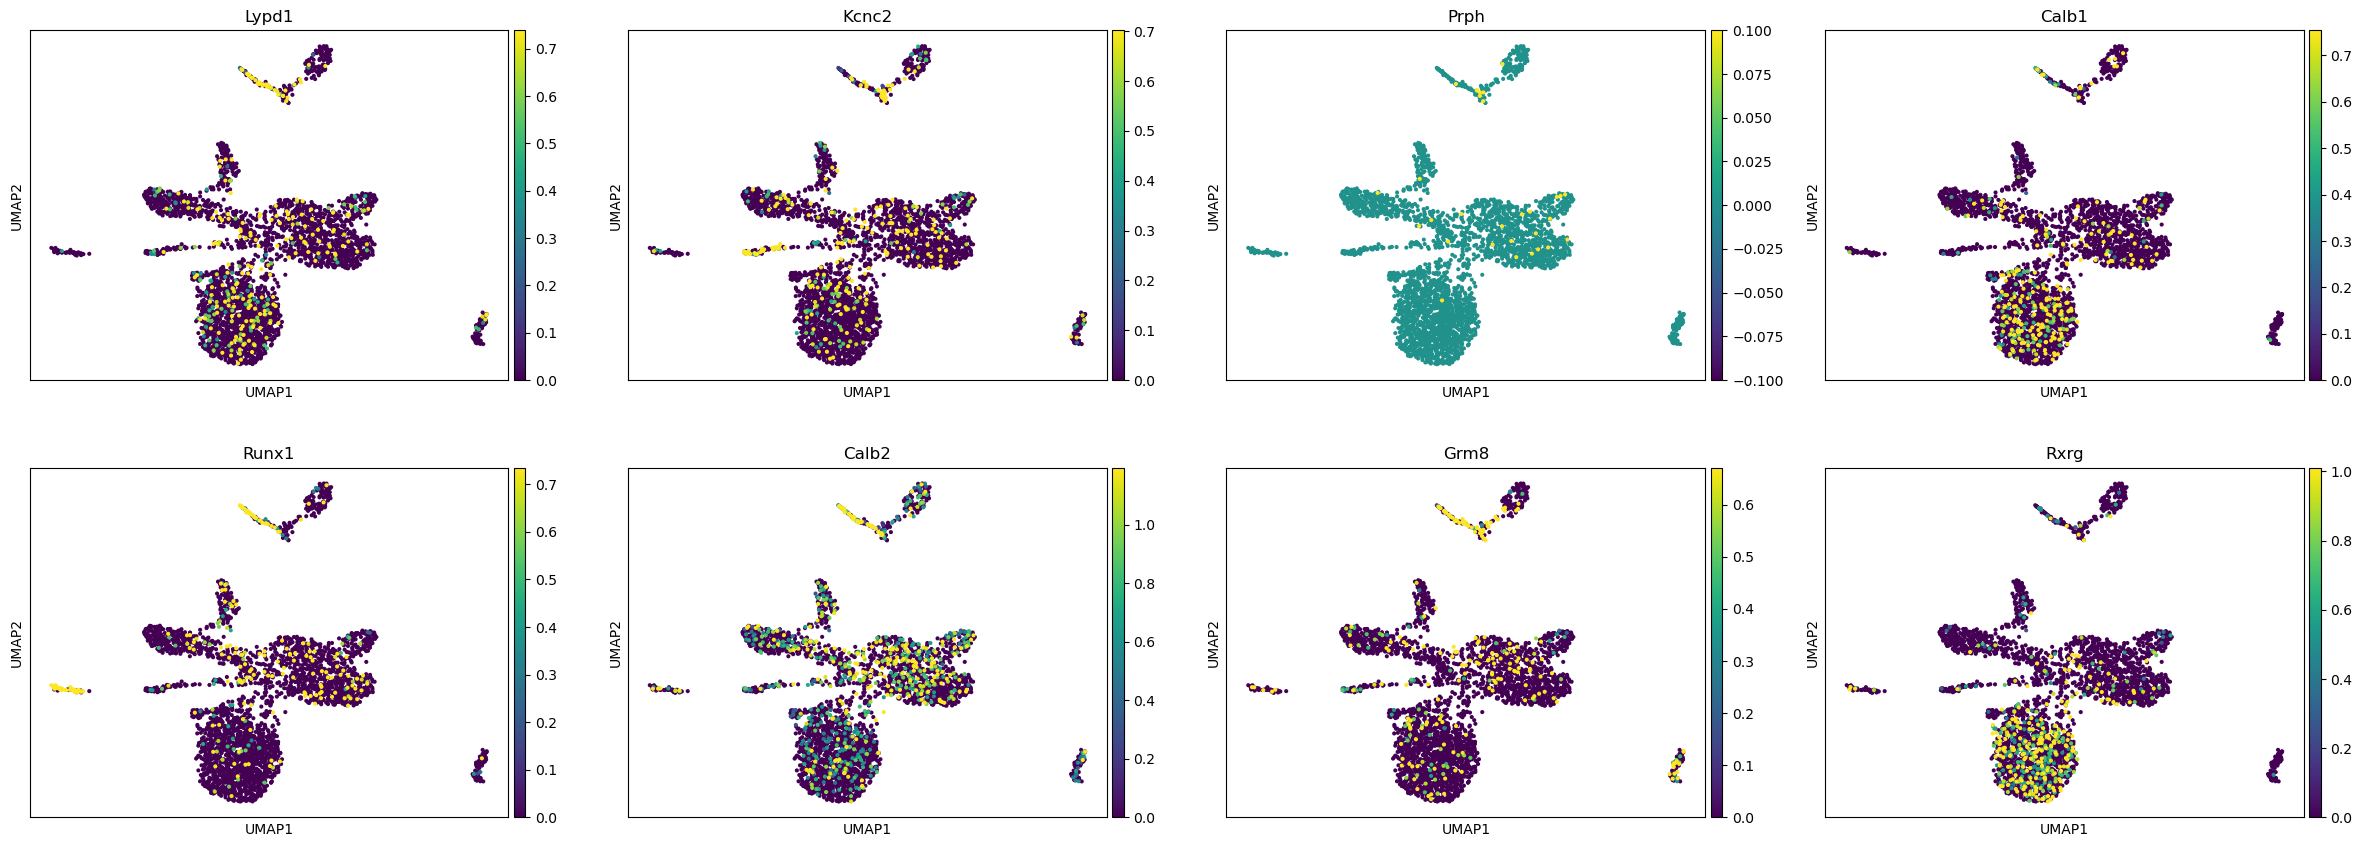

In [102]:
sc.pl.umap(adata,color=['Lypd1','Kcnc2','Prph','Calb1','Runx1','Calb2','Grm8','Rxrg'],vmax='p95',layer='log1p')

[Executed on 2023-11-21 13:24:24.407476]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


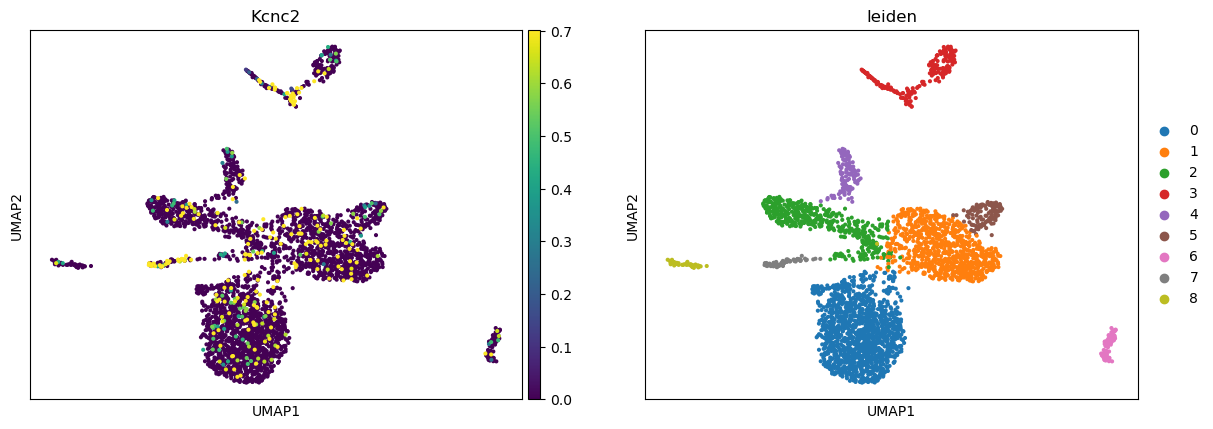

In [108]:
sc.pl.umap(adata,color=['Kcnc2','leiden'],vmax='p95',layer='log1p')

[Executed on 2023-11-21 13:23:51.491662]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

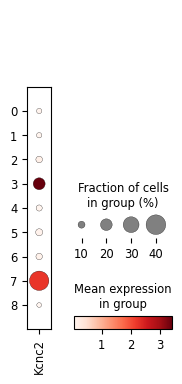

In [107]:
sc.pl.dotplot(adata,['Kcnc2'],groupby='leiden')

In [103]:
modified=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/modified_intersection_16_plates.h5ad")


[Executed on 2023-11-21 13:19:05.519996]


[Executed on 2023-11-21 13:19:25.313502]


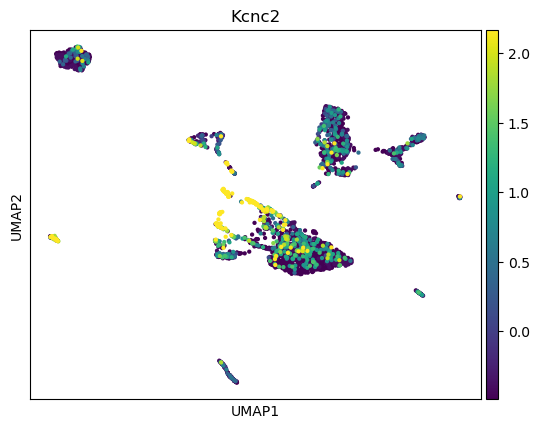

In [105]:
sc.pl.umap(modified,color='Kcnc2',vmax='p95')

[Executed on 2023-11-21 13:23:09.739416]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

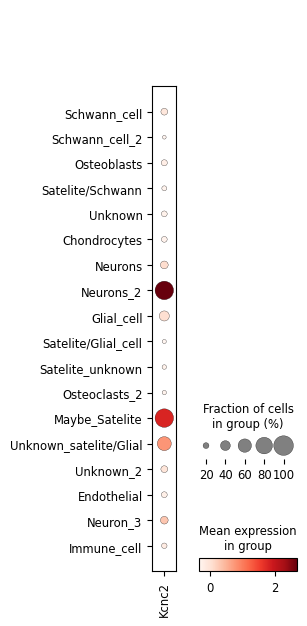

In [106]:
sc.pl.dotplot(modified, ['Kcnc2'], groupby='leiden')